# Utility methods ( utils )

Utility methods provide auxiliary functions to simplify fatigue and fracture analysis.

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]
plt.style.use( "default" )

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

## Fitter for SN curve

Class `FitterForSnCurve` creates a fitter for the SN curve.

This fitter (not fitting) has a query function `getN` and represents the SN curve itself. For the given experimental data, the fitter assumes the linear relation between the `S` and `log(N)` if `S` is larger than the fatigue limit. Therefore, if a given `S` is less than or equal fatigue limit, the `getN` will return `-1` representing no fatigue damage is caused by the current `S`. Otherwise, `getN` will return the estimated `N` value representing the fatigue failure cycles under the current `S`.

#### Class initialization help

In [2]:
from ffpack.utils import FitterForSnCurve
help( FitterForSnCurve.__init__ )

Help on function __init__ in module ffpack.utils.fdrUtils:

__init__(self, data, fatigueLimit)
    Initialize a fitter for a SN curve based on the experimental data.
    
    Parameters
    ----------
    data: 2d array
        Experimental data for fitting in a 2D matrix,
        e.g., [ [ N1, S1 ], [ N2, S2 ], ..., [ Ni, Si ] ]
    
    fatigueLimit: scalar
        Fatigue limit indicating the minimum S that can cause fatigue.
    
    Raises
    ------
    ValueError
        If the data dimension is not 2.
        If the data length is less than 2.
        If the fatigueLimit is less than or equal 0.
        If N_i or S_i is less than or equal 0.
    
    Examples
    --------
    >>> from ffpack.utils import fitterForSnCurve
    >>> data = [ [ 10, 3 ], [ 1000, 1 ] ]
    >>> fatigueLimit = 0.5
    >>> fitterForSnCurve = FitterForSnCurve( data, fatigueLimit )



#### Function `getN` help

In [3]:
help( FitterForSnCurve.getN )

Help on function getN in module ffpack.utils.fdrUtils:

getN(self, S)
    Query fatigue life N for a given S
    
    Parameters
    ----------
    S: scalar
        Input S for fatigue life query.
    
    Returns
    -------
    rst: scalar
        Fatigue life under the query S. 
        If S is less than or equal fatigueLimit, -1 will be returned. 
    
    Raises
    ------
    ValueError
        If the S is less than or equal 0.
    
    Examples
    --------
    >>> rst = fitterForSnCurve.getN( 2 )



#### Example with default values

In [4]:
data = [ [ 10, 3 ], [ 1000, 1 ] ]
fatigueLimit = 0.5
fitterForSnCurve = FitterForSnCurve( data, fatigueLimit )

queryS = [ 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0 ]
calN = [ fitterForSnCurve.getN( s ) for s in queryS ]

for index, s in enumerate( queryS ):
    print( "Fatigue failure cycles at S == %s: " % s, "{:.2f}".format( calN[ index ] ) )

plotStartIndex = next( x[ 0 ] for x in enumerate( queryS ) if x[ 1 ] > fatigueLimit )

Fatigue failure cycles at S == 0.2:  -1.00
Fatigue failure cycles at S == 0.5:  -1.00
Fatigue failure cycles at S == 1.0:  1000.00
Fatigue failure cycles at S == 1.5:  316.23
Fatigue failure cycles at S == 2.0:  100.00
Fatigue failure cycles at S == 2.5:  31.62
Fatigue failure cycles at S == 3.0:  10.00
Fatigue failure cycles at S == 4.0:  1.00
Fatigue failure cycles at S == 5.0:  0.10


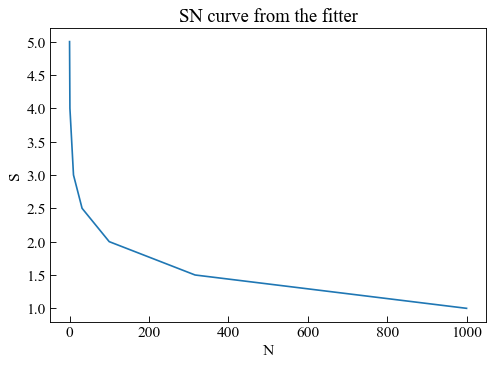

In [5]:
fig, ax = plt.subplots()

ax.plot( np.array( calN )[ plotStartIndex: ], 
         np.array( queryS )[ plotStartIndex: ] )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "S" )
ax.set_xlabel( "N" )
ax.set_title( "SN curve from the fitter" )

plt.tight_layout()
plt.show()

## Counting results to counting matrix

Function `countingRstToCountingMatrix` returns the cycle counting matrix and corresponding index from the cycle counting results.

#### Function help

In [6]:
from ffpack.utils import countingRstToCountingMatrix
help( countingRstToCountingMatrix )

Help on function countingRstToCountingMatrix in module ffpack.utils.lsmUtils:

countingRstToCountingMatrix(countingRst)
    Calculate counting matrix from rainflow counting result.
    
    Parameters
    ----------
    countingRst: 2d array
        Cycle counting result in form of [ [ rangeStart1, rangeEnd1, count1 ], 
        [ rangeStart2, rangeEnd2, count2 ], ... ].
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 2.
        If the data is not empty and not in dimension of n by 3.
    
    Examples
    --------
    >>> from ffpack.lsm import countingRstToCountingMatrix
    >>> countingRst = [ [ -2.0, 1.0, 1.0 ], [ 5.0, -1.0, 3.0 ], [ -4.0, 4.0, 0.5 ] ]
    >>> rst, matrixIndexKey = countingRstToCountingMatrix( countingRst )



#### Example with default values

In [7]:
cctcmRst = [ [ -2.0, 1.0, 1.0 ], [ 5.0, -1.0, 3.0 ], [ -4.0, 4.0, 0.5 ] ]
cctcmMat, cctcmMatIndexKey = countingRstToCountingMatrix( cctcmRst )

cctcmMat = np.array( cctcmMat )
cctcmMatIndex = np.array( cctcmMatIndexKey ).astype( float )

In [8]:
print( "Cycle counting matrix" )
print( cctcmMat )
print()
print( "Matrix index" )
print( cctcmMatIndex )

Cycle counting matrix
[[0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  3.  0.  0.  0. ]]

Matrix index
[-4. -2. -1.  1.  4.  5.]


## Cycle counting aggregation

After the cycle counting, we usually obtain a 2D matrix with the format: `[ [ value, count ],[ value, count ], ... ]`. However, the counting results are very noisy if no preprocessing procedure is applied to the load sequence. For example, we might count two cycles with a range of 0.96, a half cycle with a range of 0.98, etc. Then, the resutls will be `[ [ 0.96, 2 ],[ 0.98, 0.5 ], ... ]`. We expected the counting results to be aggregated as `[ [ 1, 2.5 ], ... ]`. This function can aggregate based on the bin size and generate the cleaned counting results.

#### Function help

In [9]:
from ffpack.utils import cycleCountingAggregation
help( cycleCountingAggregation )

Help on function cycleCountingAggregation in module ffpack.utils.lccUtils:

cycleCountingAggregation(data, binSize=1.0)
    Count the number of occurrences of each cycle digitized to the nearest bin.
    
    Parameters
    ----------
    data: 2d array
        Input cycle counting data [ [ value, count ], ... ] for bin collection 
    
    binSize: scalar, optional
        bin size is the difference between each level, 
        for example, binSize=1.0, the levels will be 0.0, 1.0, 2.0, 3.0 ...
    
    Returns
    -------
    rst: 2d array
        Aggregated [ [ aggregatedValue, count ] ] by the binSize
    
    
    Raises
    ------
    ValueError
        If the data dimension is not 2.
        If the data is empty
    
    Notes
    -----
    When a value is in the middle, it will be counted downward
    for example, 0.5 when binSize=1.0, the count will be counted to 0.0 
    
    Examples
    --------
    >>> from ffpack.utils import cycleCountingAggregation
    >>> data = [ [ 1.

#### Example with default values

In [10]:
ccaLccData = [ [ 1.7, 2.0 ], [ 2.2, 2.0 ] ]
ccaResults = cycleCountingAggregation( ccaLccData )

In [11]:
print( ccaResults )

[[2.0, 4.0]]


## Sequence peak and valleys

Function `sequencePeakAndValleys` returns the peaks and valleys of a sequence.

#### Function help

In [12]:
from ffpack.utils import sequencePeakAndValleys
help( sequencePeakAndValleys )

Help on function sequencePeakAndValleys in module ffpack.utils.generalUtils:

sequencePeakAndValleys(data, keepEnds=False)
    Remove the intermediate value and only get the peaks and valleys of the data
    
    The peak and valley refer the data points that are EXACTLY above and below
    the neighbors, not equal. 
    
    Parameters
    ----------
    data: 1darray
        Sequence data to get peaks and valleys.
    
    keepEnds: bool, optional
        If two ends of the original data should be preserved.
    
    Returns
    -------
    rst: 1darray
        A list contains the peaks and valleys of the data.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2 with keedEnds == False
        If the data length is less than 3 with keedEnds == True
    
    Examples
    --------
    >>> from ffpack.utils import sequencePeakAndValleys
    >>> data = [ -0.5, 1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5, 1.0 ]
    >>> 

#### Example with default values

In [13]:
gspvSequenceData = [ -0.5, 0.0, 1.0, -1.0, -2.0, -1.0, 1.5, 3.0, 2.5, -1.0, 0.5, 1.5, 4.5, 
                     3.5, 1.0, -1.0, -2.5, -1.5, 3.0, 3.5, 1.5, 0.0, -1.5, 0.5, 1.0 ]

gspvResults = sequencePeakAndValleys( gspvSequenceData, keepEnds=False )

In [14]:
print( gspvResults )

[1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5]


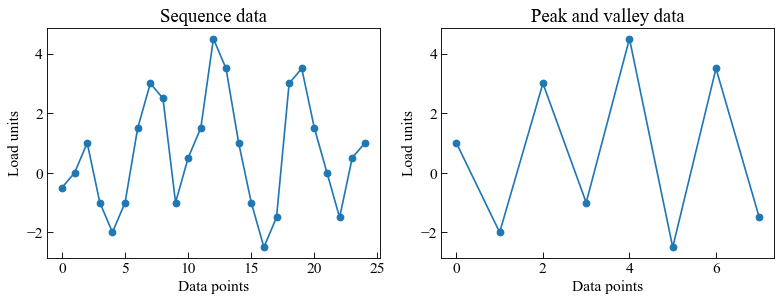

In [15]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( gspvSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( gspvResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Peak and valley data" )

plt.tight_layout()
plt.show()

#### Example with keep end points

In [16]:
from ffpack.utils import sequencePeakAndValleys

In [17]:
gspvSequenceData = [ -0.5, 0.0, 1.0, -1.0, -2.0, -1.0, 1.5, 3.0, 2.5, -1.0, 0.5, 1.5, 4.5, 
                     3.5, 1.0, -1.0, -2.5, -1.5, 3.0, 3.5, 1.5, 0.0, -1.5, 0.5, 1.0 ]

gspvResults = sequencePeakAndValleys( gspvSequenceData, keepEnds=True )

In [18]:
print( gspvResults )

[-0.5, 1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5, 1.0]


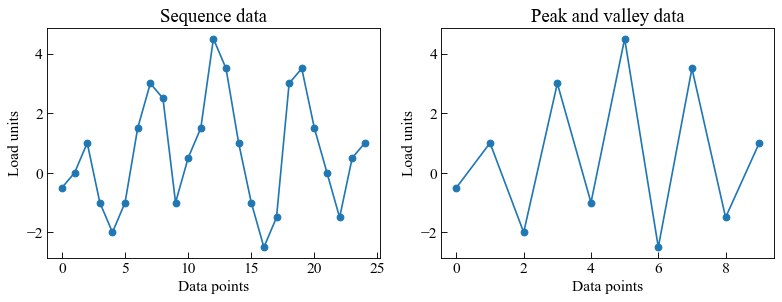

In [19]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( gspvSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( gspvResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Peak and valley data" )

plt.tight_layout()
plt.show()

## Sequence degitization

Function `sequenceDigitization` can digitize a sequence with specific resolution.

#### Function help

In [20]:
from ffpack.utils import sequenceDigitization
help( sequenceDigitization )

Help on function sequenceDigitization in module ffpack.utils.generalUtils:

sequenceDigitization(data, resolution=1.0)
    Digitize the sequence data to a specific resolution
    
    The sequence data are digitized by the round method. 
    
    Parameters
    ----------
    data: 1d array
        Sequence data to digitize.
    
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 1d array
        A list contains the digitized data.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2 with keedEnds == False
        If the data length is less than 3 with keedEnds == True
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.utils import sequenceDigitization 
    >>> data = [ -1.0, 2.3, 1.8, 0.6, -0.4, 0.8, -1.6, -2.5, 3.4, 0.3, 0.1 ]
    >>> rst = seq

#### Example with default values

In [21]:
dstrSequenceData = [ -1.0, 2.3, 1.8, 0.6, -0.4, 0.8, -1.6, -2.5, 3.4, 0.3, 0.1 ]

dstrResults = sequenceDigitization( dstrSequenceData, resolution=1.0 )

In [22]:
print( dstrResults )

[-1.0, 2.0, 2.0, 1.0, -0.0, 1.0, -2.0, -2.0, 3.0, 0.0, 0.0]


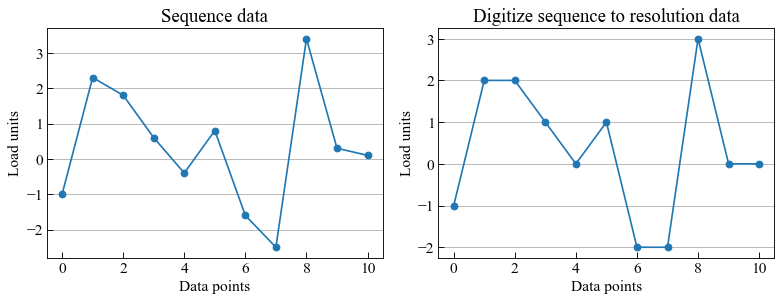

In [23]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( dstrSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )
ax1.grid( axis='y', color="0.7" )

ax2.plot( dstrResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Digitize sequence to resolution data" )
ax2.grid( axis='y', color="0.7" )

plt.tight_layout()
plt.show()